# Stoich45 Model Analysis - SVM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

import time
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
int_df = pd.read_csv('Stoich45_FeatureSelected_dataset.csv')
int_df

,atomic_num_standard_deviation,atomic_num_max,group_num_mean,period_num_mean,electronegativity_min,electron_affinity_mean,electron_affinity_geometric_mean,electron_affinity_standard_deviation,melting_mean,melting_geometric_mean,...,density_geometric_mean,density_standard_deviation,density_max,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min,outputs.hse06.bandgap,MOF
0,5.689851,29.0,7.960000,1.600000,1.90,100.252000,82.167123,45.559861,1143.143600,107.487344,...,4.182460,1912.665927,8960.0,1233.652000,1223.402105,146.933016,1402.3,745.5,3.751390,qmof-0000295
1,3.088689,19.0,13.700000,2.050000,0.82,110.030000,72.816144,57.821122,1199.022000,206.066393,...,15.205775,1023.803409,2260.0,1218.510000,1187.405501,219.174061,1402.3,418.8,3.014584,qmof-000512e
2,6.272068,30.0,10.363636,1.818182,1.65,100.818182,0.000000,58.491030,1114.843636,141.329527,...,8.874182,1680.181346,7140.0,1230.522727,1221.752785,142.324105,1402.3,906.4,3.284171,qmof-00052d0
3,8.169828,48.0,8.687500,1.656250,1.69,110.787500,0.000000,42.372240,1231.431562,122.519183,...,5.589511,1726.258029,8650.0,1228.065625,1221.424040,122.525772,1313.9,867.8,5.170849,qmof-0006638
4,4.436880,27.0,9.097561,1.658537,1.88,104.460976,82.484786,49.421674,1552.056341,186.153480,...,10.509249,1648.227778,8900.0,1219.541463,1210.807020,139.686543,1402.3,760.4,3.978235,qmof-002580c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,6.968540,29.0,11.352941,2.000000,1.90,121.117647,67.620679,100.512201,1467.541765,253.964277,...,17.891800,2183.677437,8960.0,1213.182353,1199.398347,171.503666,1402.3,745.5,3.030492,qmof-ffe63dd
8350,11.575955,48.0,11.185185,2.000000,1.69,93.111111,0.000000,62.259852,935.485926,130.152404,...,8.712412,2311.005049,8650.0,1234.559259,1223.359359,158.253641,1402.3,867.8,4.483906,qmof-ffeae31
8351,8.317703,48.0,10.903226,1.903226,1.69,102.548387,0.000000,64.328877,1786.626452,330.048989,...,40.085683,1712.755584,8650.0,1193.154839,1183.393508,151.921017,1402.3,867.8,3.510606,qmof-ffeef76
8352,5.857798,30.0,9.739130,1.739130,1.65,116.756522,0.000000,44.348843,1706.767826,241.158462,...,19.449685,1662.683156,7140.0,1196.652174,1189.732816,126.320937,1313.9,906.4,4.055379,qmof-fff4e91


Load and preprocess

In [3]:
# Extract the target variable
y = int_df['outputs.hse06.bandgap']

# Drop target from feature set
X = int_df.drop(columns=['outputs.hse06.bandgap', 'MOF'])

# Standardize features
scaler_int = StandardScaler()

X = scaler_int.fit_transform(X)

Split data into Train, Validation, and Test Sets

In [4]:
seed = 1234

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=seed)

Train a simple SVM model

In [5]:
# Define the SVM model with default parameters
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Predict on validation set
y_pred = svr.predict(X_cv)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_cv, y_pred))
r2 = r2_score(y_cv, y_pred)

print(f"Default SVR - RMSE: {rmse:.4f}")
print(f"Default SVR - R² Score: {r2:.4f}")

Default SVR - RMSE: 0.7565
Default SVR - R² Score: 0.5101


Perform Hyperparameter tuning

In [6]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],  # Margin of tolerance
    'kernel': ['linear', 'rbf', 'poly']  # Different kernel functions
}

# Initialize the SVR model
svr = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   3.6s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   3.6s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   3.7s
[CV] END .................C=0.1, epsilon=0.01, kernel=linear; total time=   3.7s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   4.5s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   4.5s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   4.6s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   4.8s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   3.4s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   3.4s
[CV] END ...................C=0.1, epsilon=0.01, kernel=poly; total time=   3.4s
[CV] END ...................C=0.1, epsilon=0.01

GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [8]:
# Best parameters
best_params_1 = grid_search.best_params_
print("Best Parameters:", best_params_1)

# Best model
best_svm_1 = grid_search.best_estimator_
print("Best Model:", best_svm_1)

# Define 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_svm_1, X_cv, y_cv, cv=kf)

# Metrics
mse_cv_1 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_1 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_1:.4f}")
print(f"4-Fold CV MAE: {mae_cv_1:.4f}")



# Predictions and performance evaluation
y_pred = best_svm_1.predict(X_cv)
mse_1 = mean_squared_error(y_cv, y_pred)
r2_1 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_1:.4f}")
print(f"Final Model R²: {r2_1:.4f}")



Best Parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}
Best Model: SVR(C=10, epsilon=0.5)
4-Fold CV MSE: 0.6463
4-Fold CV MAE: 0.6085
Final Model MSE: 0.5232
Final Model R²: 0.5521


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

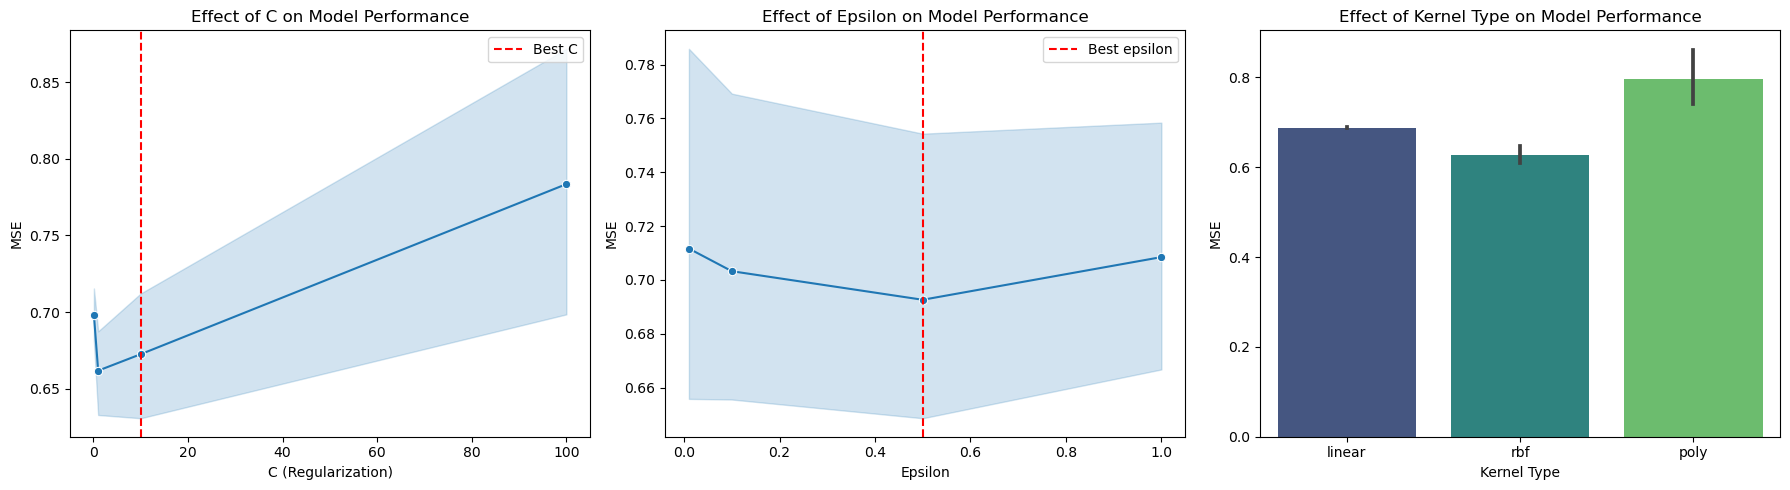

In [9]:
# Convert results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Extract numeric parameters for plotting
cv_results["param_C"] = cv_results["param_C"].astype(float)
cv_results["param_epsilon"] = cv_results["param_epsilon"].astype(float)

# Convert negative MSE to positive for better visualization
cv_results["MSE"] = -cv_results["mean_test_score"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot effect of C (Regularization parameter)
sns.lineplot(ax=axes[0], x=cv_results["param_C"], y=cv_results["MSE"], marker="o")
axes[0].axvline(x=grid_search.best_params_['C'], color='r', linestyle='--', label='Best C')
axes[0].set_xlabel("C (Regularization)")
axes[0].set_ylabel("MSE")
axes[0].set_title("Effect of C on Model Performance")
axes[0].legend()

# Plot effect of epsilon (Margin of Tolerance)
sns.lineplot(ax=axes[1], x=cv_results["param_epsilon"], y=cv_results["MSE"], marker="o")
axes[1].axvline(x=grid_search.best_params_['epsilon'], color='r', linestyle='--', label='Best epsilon')
axes[1].set_xlabel("Epsilon")
axes[1].set_ylabel("MSE")
axes[1].set_title("Effect of Epsilon on Model Performance")
axes[1].legend()

# Plot effect of kernel choice
sns.barplot(ax=axes[2], x=cv_results["param_kernel"], y=cv_results["MSE"], palette="viridis")
axes[2].set_xlabel("Kernel Type")
axes[2].set_ylabel("MSE")
axes[2].set_title("Effect of Kernel Type on Model Performance")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Attempt 2: Further Fine-tuning

In [10]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 7, 9, 10, 12, 15],  # Regularization parameter
    'epsilon': [0.5],  # Margin of tolerance
    'kernel': ['rbf']  # Different kernel functions
}

# Initialize the SVR model
svr = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 11 candidates, totalling 44 fits
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   2.5s
[CV] END .....................C=0.5, epsilon=0.5, kernel=rbf; total time=   2.4s
[CV] END .....................C=0.5, epsilon=0.5, kernel=rbf; total time=   2.5s
[CV] END .....................C=0.5, epsilon=0.5, kernel=rbf; total time=   2.5s
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   2.6s
[CV] END .....................C=0.5, epsilon=0.5, kernel=rbf; total time=   2.6s
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   2.4s
[CV] END .....................C=0.1, epsilon=0.5, kernel=rbf; total time=   2.8s
[CV] END .......................C=1, epsilon=0.5, kernel=rbf; total time=   2.2s
[CV] END .......................C=1, epsilon=0.5, kernel=rbf; total time=   2.2s
[CV] END .......................C=1, epsilon=0.5, kernel=rbf; total time=   2.3s
[CV] END .......................C=1, epsilon=0.5

GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 5, 7, 9, 10, 12, 15],
                         'epsilon': [0.5], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Best parameters
best_params_2 = grid_search.best_params_
print("Best Parameters:", best_params_2)

# Best model
best_svm_2 = grid_search.best_estimator_
print("Best Model:", best_svm_2)

# Define 4-fold cross-validation
kf2 = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_svm_2, X_cv, y_cv, cv=kf2)

# Metrics
mse_cv_2 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_2 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_2:.4f}")
print(f"4-Fold CV MAE: {mae_cv_2:.4f}")



# Predictions and performance evaluation
y_pred = best_svm_2.predict(X_cv)
mse_2 = mean_squared_error(y_cv, y_pred)
r2_2 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_2:.4f}")
print(f"Final Model R²: {r2_2:.4f}")


Best Parameters: {'C': 7, 'epsilon': 0.5, 'kernel': 'rbf'}
Best Model: SVR(C=7, epsilon=0.5)
4-Fold CV MSE: 0.6364
4-Fold CV MAE: 0.6048
Final Model MSE: 0.5256
Final Model R²: 0.5501


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


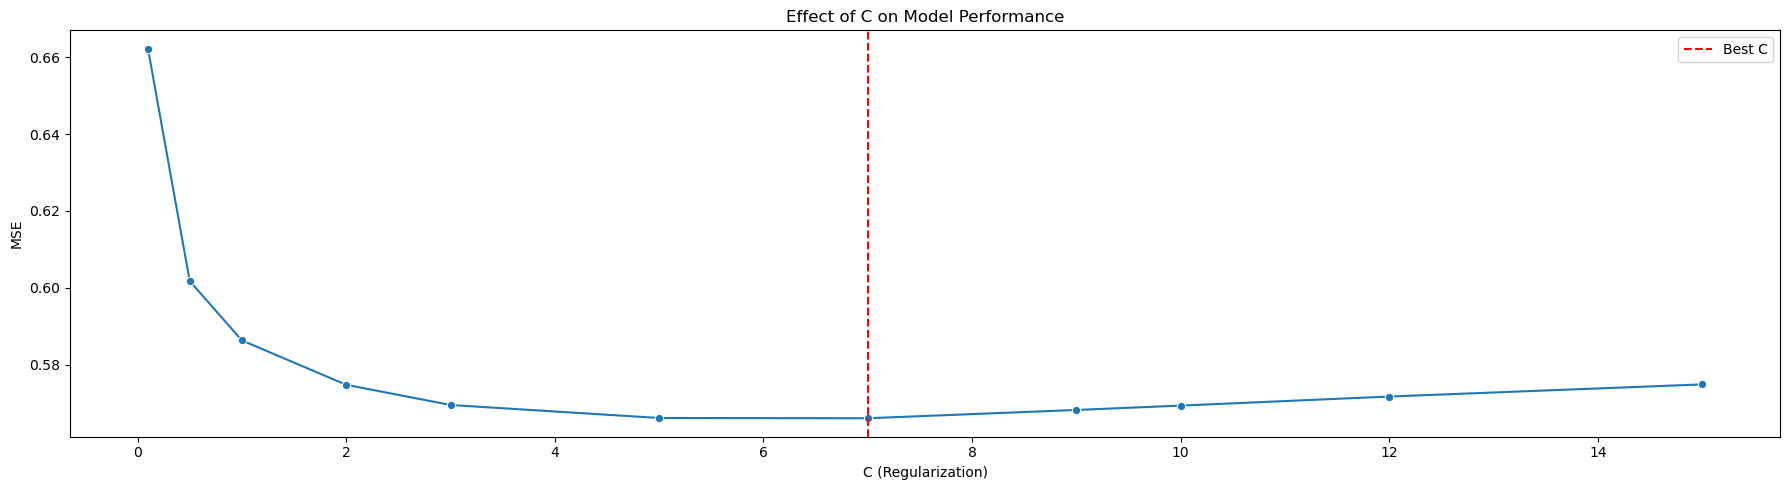

In [12]:
# Convert results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Extract numeric parameters for plotting
cv_results["param_C"] = cv_results["param_C"].astype(float)
cv_results["param_epsilon"] = cv_results["param_epsilon"].astype(float)

# Convert negative MSE to positive for better visualization
cv_results["MSE"] = -cv_results["mean_test_score"]

# Create subplots
fig, axes = plt.subplots( figsize=(18, 5))

# Plot effect of C (Regularization parameter)
sns.lineplot(ax=axes, x=cv_results["param_C"], y=cv_results["MSE"], marker="o")
axes.axvline(x=grid_search.best_params_['C'], color='r', linestyle='--', label='Best C')
axes.set_xlabel("C (Regularization)")
axes.set_ylabel("MSE")
axes.set_title("Effect of C on Model Performance")
axes.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Use SHAP top features: 15 and see if error reduces

In [13]:
top_features_shap = ['density_mean', 'density_standard_deviation',
       'ionization_energy_standard_deviation', 'electron_affinity_mean',
       'electron_affinity_standard_deviation', 'group_num_mean',
       'atomic_num_standard_deviation', 'boiling_geometric_mean',
       'density_geometric_mean', 'ionization_energy_geometric_min',
       'ionization_energy_max', 'atomic_num_max', 'electronegativity_min',
       'density_max', 'melting_geometric_mean'] # top 15 from random forest nb

# Extract target variable
y = int_df['outputs.hse06.bandgap']

# Keep only the top features
X = int_df[top_features_shap]
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_cv, y_train, y_cv = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)



In [14]:
# Define the SVM model
svr = SVR()

# Define hyperparameter grid for tuning
param_grid = {
    "C": [7],  # Regularization parameter
    "kernel": ["rbf"],  # Radial Basis Function kernel
    "epsilon": [0.5],  # Defines the epsilon-tube within which no penalty is given
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END .......................C=7, epsilon=0.5, kernel=rbf; total time=   0.8s
[CV] END .......................C=7, epsilon=0.5, kernel=rbf; total time=   0.8s
[CV] END .......................C=7, epsilon=0.5, kernel=rbf; total time=   0.9s
[CV] END .......................C=7, epsilon=0.5, kernel=rbf; total time=   0.9s


GridSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [7], 'epsilon': [0.5], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [15]:
# Best parameters
best_params_3 = grid_search.best_params_
print("Best Parameters:", best_params_3)

# Best model
best_svm_3 = grid_search.best_estimator_
print("Best Model:", best_svm_3)

# Define 4-fold cross-validation
kf3 = KFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_cv = cross_val_predict(best_svm_3, X_cv, y_cv, cv=kf3)

# Metrics
mse_cv_3 = mean_squared_error(y_cv, y_pred_cv)
mae_cv_3 = mean_absolute_error(y_cv, y_pred_cv)

print(f"4-Fold CV MSE: {mse_cv_3:.4f}")
print(f"4-Fold CV MAE: {mae_cv_3:.4f}")



# Predictions and performance evaluation
y_pred = best_svm_3.predict(X_cv)
mse_3 = mean_squared_error(y_cv, y_pred)
r2_3 = r2_score(y_cv, y_pred)

print(f"Final Model MSE: {mse_3:.4f}")
print(f"Final Model R²: {r2_3:.4f}")

Best Parameters: {'C': 7, 'epsilon': 0.5, 'kernel': 'rbf'}
Best Model: SVR(C=7, epsilon=0.5)
4-Fold CV MSE: 0.6385
4-Fold CV MAE: 0.6046
Final Model MSE: 0.5374
Final Model R²: 0.5400


/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/simran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


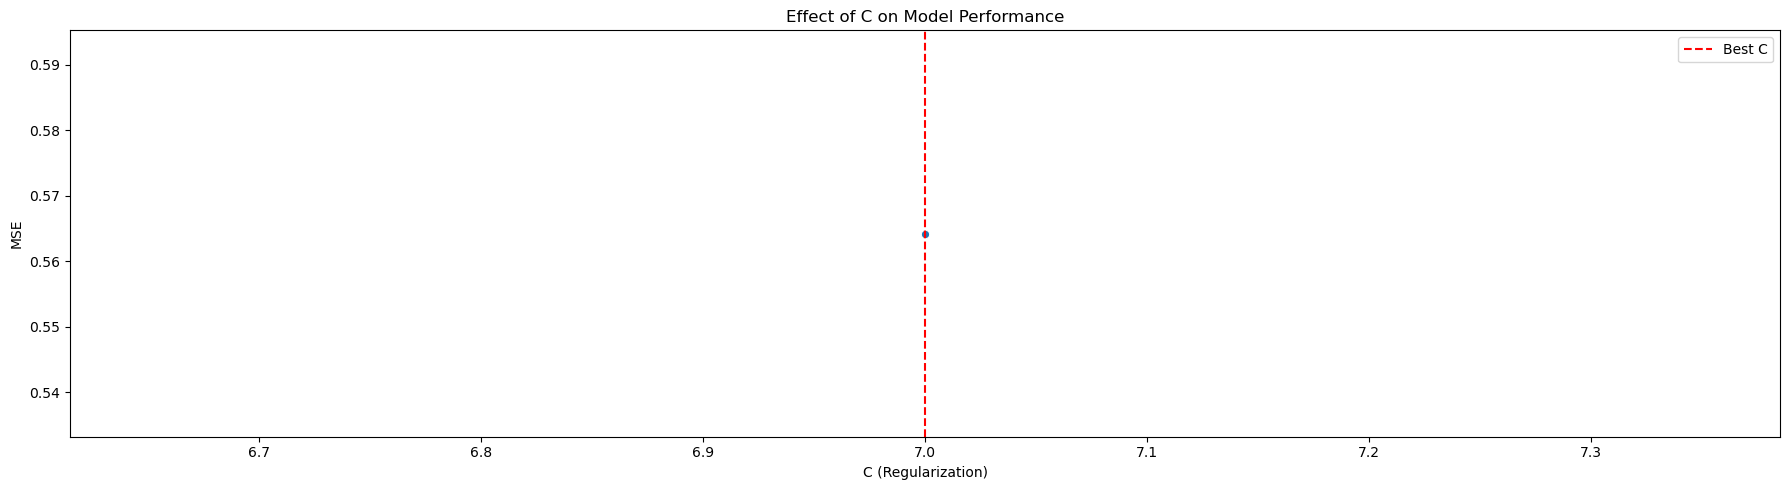

In [16]:
# Convert results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Extract numeric parameters for plotting
cv_results["param_C"] = cv_results["param_C"].astype(float)
cv_results["param_epsilon"] = cv_results["param_epsilon"].astype(float)

# Convert negative MSE to positive for better visualization
cv_results["MSE"] = -cv_results["mean_test_score"]

# Create subplots
fig, axes = plt.subplots( figsize=(18, 5))

# Plot effect of C (Regularization parameter)
sns.lineplot(ax=axes, x=cv_results["param_C"], y=cv_results["MSE"], marker="o")
axes.axvline(x=grid_search.best_params_['C'], color='r', linestyle='--', label='Best C')
axes.set_xlabel("C (Regularization)")
axes.set_ylabel("MSE")
axes.set_title("Effect of C on Model Performance")
axes.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()